In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os 
from IPython.display import clear_output
from PIL import Image

# Using PIL to generate dataset 

In [3]:
def generate_images(num, class_number, numclass, bg_path, class1_path, class2_path, save_path, class_name, current, face_class, face_num):
    backg_list = os.listdir(bg_path)
    class_list = os.listdir(class1_path)
#     face_classes = [class_front,class_left,class_right]
#     face_number = [2,3,4]
    
    for i in range(num):
        clear_output(wait= True)
        print(str(current)+'/'+str(num*6))
        current = current + 1
        
        bg_rand = np.random.randint(0,len(backg_list)) #random pick one background
        bg_img = Image.open(bg_path + backg_list[bg_rand]).rotate(-90,expand = True) #open the random BG image
        bg_img = bg_img.resize((640,960), Image.NEAREST) #resize the BG 
        
        #normalised coordinates 
        if(os.path.isfile('Labels/'+class_name+'/'+class_name+'_'+str(i)+".txt")): #check if label exists
            os.remove('Labels/'+class_name+'/'+class_name+'_'+str(i)+".txt") #if exist delete it
        
        f = open('Labels/'+class_name+'/'+class_name+'_'+str(i)+".txt","x") #create new text file for label
        
        #pixel coordinates
        if(os.path.isfile('Labels_pixel/'+class_name+'/'+class_name+'_'+str(i)+".txt")): 
            os.remove('Labels_pixel/'+class_name+'/'+class_name+'_'+str(i)+".txt")
        
        fp = open('Labels_pixel/'+class_name+'/'+class_name+'_'+str(i)+".txt","x")
        
#         rand_three = np.random.randint(0,3)
#         class_three = face_classes[rand_three]
#         class_three_number = face_number[rand_three]
        
        for j in range(numclass): 
            if j== 0: 
                class_list = os.listdir(class1_path)
                class_path = class1_path
            elif(j== 1): 
                class_list = os.listdir(class2_path) #if two classes within an image
                class_path = class2_path 
            elif(j== 2): 
                class_list = os.listdir(face_class)
                class_path = face_class
                
            class_rand = np.random.randint(0,len(class_list)) #random pick images from current class and open it
            img = Image.open(class_path + class_list[class_rand])
            
            bg_size = cv2.resize( cv2.cvtColor( cv2.imread(bg_path + backg_list[bg_rand]) , cv2.COLOR_BGR2RGB ) , (640,960)).shape
            
            percent_rand = np.random.randint(10,95) #class may occupy 10 to 95 percentage of background image
            new_size_c = (percent_rand/100) * bg_size[1]
            new_size_r = (percent_rand/100) * bg_size[0]

            img = img.resize( (int(new_size_c), int(new_size_r) ), Image.NEAREST)
            class_size = np.array( [int(new_size_r), int(new_size_c)] ) 

            x_rand = np.random.randint(0-new_size_c,bg_size[1])
            y_rand = np.random.randint(0-new_size_r,bg_size[0])
            
            #prevent object out of image 
            if((x_rand + class_size[1]) >= bg_size[1]):
                x_rand = bg_size[1] - class_size[1] - 1  
            if((y_rand + class_size[0]) >= bg_size[0]):
                y_rand = bg_size[0] - class_size[0] - 1            
            if(x_rand<0):
                x_rand = 1 
            if(y_rand<0): 
                y_rand = 1
            
############################################################################################################################               

            x_centre = x_rand + new_size_c/2
            y_centre = y_rand + new_size_r/2
                        
            if(numclass>1):
                if(j == 0):
                    class_number = 0
                elif(j == 1):
                    class_number = 1
                elif(j == 2): 
                    class_number = face_num

#             intt = 1 
#             strr = '1'
            
#             if(type(class_number) == type(intt)):
            fp.writelines(str(class_number)+' '+str(int(x_centre))+' '+str(int(y_centre))+' '+str(int(new_size_c))+' '+str(int(new_size_r))+'\n')
            f.writelines(str(class_number)+' '+str(x_centre/bg_size[1])+' '+str(y_centre/bg_size[0])+' '+str(new_size_c/bg_size[1])+' '+str(new_size_r/bg_size[0])+'\n')
#             elif(type(class_number) == type(strr)): 
#                 fp.writelines(class_number+' '+str(int(x_centre))+' '+str(int(y_centre))+' '+str(int(new_size_c))+' '+str(int(new_size_r))+'\n')
#                 f.writelines(class_number+' '+str(x_centre/bg_size[1])+' '+str(y_centre/bg_size[0])+' '+str(new_size_c/bg_size[1])+' '+str(new_size_r/bg_size[0])+'\n')
            
            bg_img.paste(img,[x_rand,y_rand],img)
            
        fp.close()  
        f.close()    
        
        bg_img.save(save_path + str(i) + '.JPEG','JPEG')
         
    return current 

There are two classes, class "Ernie" or 0 and class "Dory" or 1. 
Code below generate images for class 0, class 1 and both within an image.

In [6]:
# generate_images(num, class_number, numclass, bg_path, class1_path, class2_path, save_path, class_name,current):
bg_path = 'FYP_images/original/background/'   
bg_path_without_me = 'FYP_images/original/background_without_me/'
num = 500 #*6, num for each class and mix 
current = 1

#removed background object path 
ernie_path = 'FYP_images/removed_bg/Ernie/' 
dory_path = 'FYP_images/removed_bg/Dory/'
front_path = 'FYP_images/removed_bg/face_BG_removed/front/'
left_path = 'FYP_images/removed_bg/face_BG_removed/left/'
right_path = 'FYP_images/removed_bg/face_BG_removed/right/'

# Generate class zero or Ernie      
# save_path = 'FYP_images/Generated_images/Ernie/ernie_'
# current = generate_images(num,0,1,bg_path,ernie_path,_,save_path,'ernie',current,_,_)

# Generate class one or Dory
save_path = 'FYP_images/Generated_images/Dory/dory_'
current = generate_images(num,1,1,bg_path,dory_path,_,save_path,'dory',current,_,_)

# # Generate class two or Front face 
# save_path = 'FYP_images/Generated_images/Front/front_'
# current = generate_images(num,2,1,bg_path_without_me,front_path,_,save_path,'front',current,_,_)

# # Generate class three or Left face 
# save_path = 'FYP_images/Generated_images/Left/left_'
# current = generate_images(num,3,1,bg_path_without_me,left_path,_,save_path,'left',current,_,_)

# # #Generate class four ot Right face 
# save_path = 'FYP_images/Generated_images/Right/right_'
# current = generate_images(num,4,1,bg_path_without_me,right_path,_,save_path,'right',current,_,_)

# # Generate both classes with Front face 
# save_path = 'FYP_images/Generated_images/Mix_front/mix_front_' 
# current = generate_images(num,_,3,bg_path_without_me,ernie_path,dory_path,save_path,'mix_front',current,front_path,2)

# # Generate both classes with left face 
# save_path = 'FYP_images/Generated_images/Mix_left/mix_left_' 
# current = generate_images(num,_,3,bg_path_without_me,ernie_path,dory_path,save_path,'mix_left',current,left_path,3)

# # Generate both classes with right face 
# save_path = 'FYP_images/Generated_images/Mix_right/mix_right_' 
# current = generate_images(num,_,3,bg_path_without_me,ernie_path,dory_path,save_path,'mix_right',current,right_path,4)

print("Done")

500/3000
Done


### Example of generated images

Code below plots data generate with a marker at the centre of class position in image, cyan and red dots. 

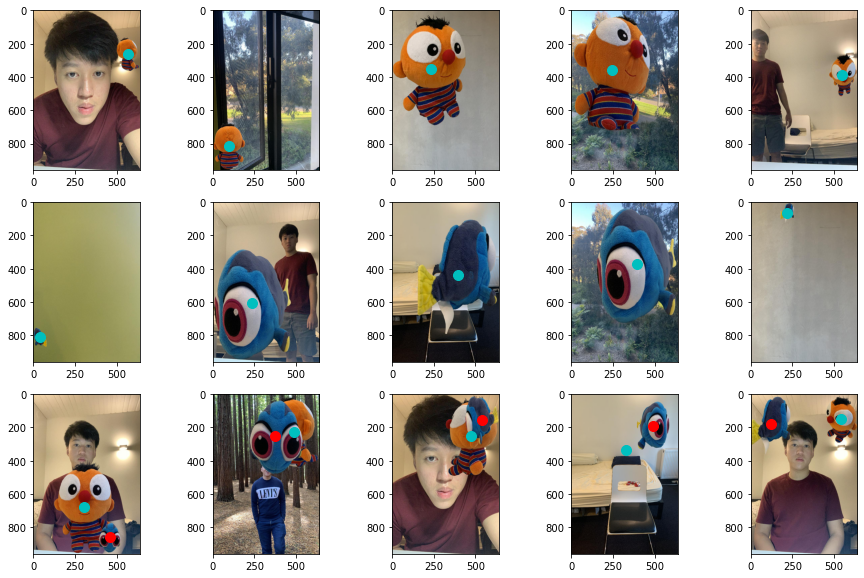

In [10]:
figure,axes = plt.subplots(6,5,figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)

pick = np.random.randint(0,500)
k = 0
for i in range(pick,pick+5): #take random range to check data validity 
    f = open('Labels_pixel/ernie/ernie_'+str(i)+'.txt','r')
    d = f.read().split(' ')
    x = int(d[1])
    y = int(d[2])
    f.close()
    
    #purely based on your file locations, please change folder paths. Current does not exist in depository due to personal privacy
    axes[0,k].imshow(cv2.cvtColor(cv2.imread('FYP_images/Generated_images/Ernie/ernie_'+str(i)+'.JPEG'),cv2.COLOR_BGR2RGB))
    axes[0,k].plot(x,y,'co',markersize = 10) 
    k= k+1

pick = np.random.randint(0,500)
k = 0
for i in range(pick,pick+5): #take random range to check data validity
    f = open('Labels_pixel/dory/dory_'+str(i)+'.txt','r')
    d = f.read().split(' ')
    x = int(d[1])
    y = int(d[2])
    f.close()

    axes[1,k].imshow(cv2.cvtColor( cv2.imread('FYP_images/Generated_images/Dory/dory_'+str(i)+'.JPEG') , cv2.COLOR_BGR2RGB ))
    axes[1,k].plot(x,y,'co',markersize = 10) 
    k = k + 1

pick = np.random.randint(0,500)
k = 0    
for i in range(pick,pick+5): #take random range to check data validity
    f = open('Labels_pixel/mix/mix_'+str(i)+'.txt','r')
    d = f.readlines()
    one = d[0].split(' ')
    two = d[1].split(' ')
    x1= int(one[1])
    y1= int(one[2])
    x2= int(two[1])
    y2= int(two[2])
    f.close()
    
    axes[2,k].imshow(cv2.cvtColor( cv2.imread('FYP_images/Generated_images/Mix/mix_'+str(i)+'.JPEG') , cv2.COLOR_BGR2RGB ))
    axes[2,k].plot(x1,y1,'co',x2,y2,'ro',markersize = 10)
    
    k = k + 1
    
pick = np.random.randint(0,500)
k = 0    
for i in range(pick,pick+5): #take random range to check data validity
    f = open('Labels_pixel/mix/mix_'+str(i)+'.txt','r')
    d = f.readlines()
    one = d[0].split(' ')
    two = d[1].split(' ')
    x1= int(one[1])
    y1= int(one[2])
    x2= int(two[1])
    y2= int(two[2])
    f.close()
    
    axes[2,k].imshow(cv2.cvtColor( cv2.imread('FYP_images/Generated_images/Mix/mix_'+str(i)+'.JPEG') , cv2.COLOR_BGR2RGB ))
    axes[2,k].plot(x1,y1,'co',x2,y2,'ro',markersize = 10)
    
    k = k + 1

In [36]:
# img = Image.open('FYP_images/Generated_images/Ernie/ernie_0.JPEG')
# im_resized  = img.resize((640,960))
# im_resized.save('resized.JPEG')

im = Image.open('FYP_images/Generated_images/Dory/dory_16.JPEG')
im.show()
img_temp = cv2.imread('FYP_images/Generated_images/Dory/dory_16.JPEG').shape 
move_rand = 0.2
a = im.crop([img_temp[1]*(1-move_rand) , 0 , img_temp[1], img_temp[0]])
a.show()

# f = open('Labels_pixel/dory/dory_'+str(16)+'.txt','r')
# d = f.read().split(' ')
# x = int(d[1])
# y = int(d[2])
# print(x,y)
# f.close()

# a = np.array([[[1,1,1],[2,2,2],[3,3,3]],[[1,1,1],[2,2,2],[3,3,3]],[[1,1,1],[2,2,2],[3,3,3]]])
# a[:,:,:][0:2][0:1]

# Rotate Video by 90 degress

In [3]:
cap = cv2.VideoCapture('IMG_2148.mov')
fps = cap.get(cv2.CAP_PROP_FPS)
width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float

fourcc = cv2.VideoWriter_fourcc(*'XVID')
fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
out = cv2.VideoWriter('out_vid_2.mov',fourcc,fps,(int(height),int(width)),True)

i= 0
while(cap.isOpened()):
    ret, frame = cap.read()
    
    if ret == False:
        print('break at: ',i)
        break
    
    frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
    out.write(frame)
#     cv2.imshow('video_to_frame/dory_'+str(i)+'.JPEG',frame)
    i+= 1

cap.release()
out.release()
cv2.destroyAllWindows()


break at:  700


# Save single frame as an image

In [6]:
cap = cv2.VideoCapture('good_face_best_pt.mp4')
fourcc = cv2.VideoWriter_fourcc(*'XVID')

i= 0
while(cap.isOpened()):
    ret, frame = cap.read()
    
    if ret == False:
        print('break at: ',i)
        break
    
#     frame = cv2.rotate(cv2.cvtColor(frame,cv2.COLOR_BGR2RBG ),cv2.ROTATE_90_CLOCKWISE)
    frame = cv2.cvtColor( frame , cv2.COLOR_BGR2RGB)
    plt.imsave('vid_2_frame_ernie/face_'+str(i)+'.JPEG',frame)
    
    i+= 1

cap.release()
# out.release()
cv2.destroyAllWindows()

break at:  886
